In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('/home/camila/Development/EleccionesVenezuela2017/src/')
#os.chdir('/home/crangel/PycharmProjects/EleccionesVenezuela2017/src/')
from data_treatment import update_dataframe
%matplotlib inline


In [2]:
#"/home/crangel/PycharmProjects/EleccionesVenezuela2017/data/EDO_DELTA_AMACURO.json"
df_deltaA =pd.read_json("/home/camila/Development/EleccionesVenezuela2017/data/EDO_MERIDA.json",lines=True)
df_deltaA.columns

Index([u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
       u'ALIRIO ARAQUE', u'ARQUIMIDES FAJARDO', u'CARLOS PAPARONI',
       u'CARLOS RAMOS', u'DANIEL GARCIA', u'ELECTORES ACTAS TRANSMITIDAS',
       u'ELECTORES INSCRITOS', u'JEHYSON GUZMAN', u'JESUS RONDON NUCETE',
       u'JORGE GAVIRIA', u'LAWRENCE CASTRO', u'LUIS ZEPPENFELDT',
       u'RAMON GUEVARA', u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS',
       u'VOTOS NULOS', u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',
       u'municipio', u'parroquia'],
      dtype='object')

In [3]:
#DELTA AMACURO
#df_out = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')

#MONAGAS
#df_out = update_dataframe(df_deltaA,'YELITZE SANTAELLA','GUILLERMO CALL')

#MERIDA
df_out = update_dataframe(df_deltaA,'JEHYSON GUZMAN','RAMON GUEVARA')

df_out.shape

(1044, 40)

Index([                    u'ABSTENCION',                          u'ACTAS',
                     u'ACTAS ESCRUTADAS',                  u'ACTAS VALIDAS',
                        u'ALIRIO ARAQUE',             u'ARQUIMIDES FAJARDO',
                      u'CARLOS PAPARONI',                   u'CARLOS RAMOS',
                        u'DANIEL GARCIA',   u'ELECTORES ACTAS TRANSMITIDAS',
                  u'ELECTORES INSCRITOS',                 u'JEHYSON GUZMAN',
                  u'JESUS RONDON NUCETE',                  u'JORGE GAVIRIA',
                      u'LAWRENCE CASTRO',               u'LUIS ZEPPENFELDT',
                        u'RAMON GUEVARA',            u'VOTANTES ESCRUTADOS',
                     u'VOTOS ESCRUTADOS',                    u'VOTOS NULOS',
                        u'VOTOS VALIDOS',                         u'centro',
                               u'estado',                           u'mesa',
                            u'municipio',                      u'parroquia',

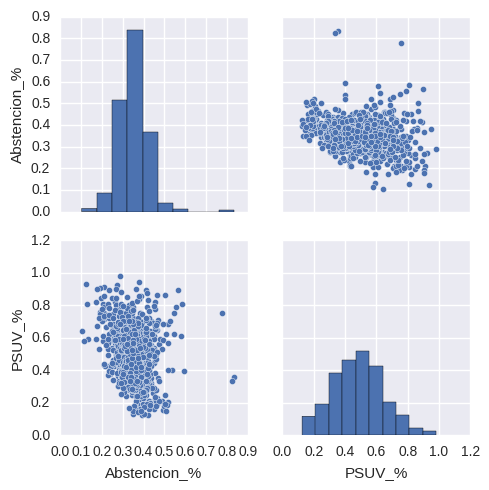

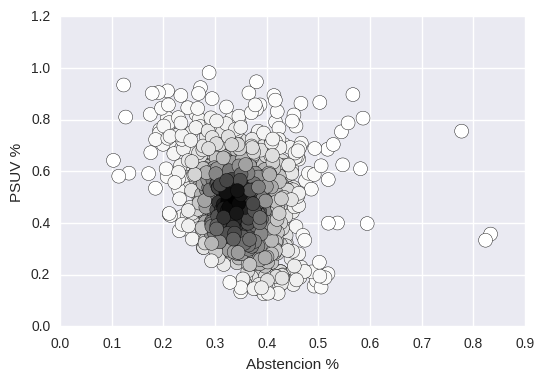

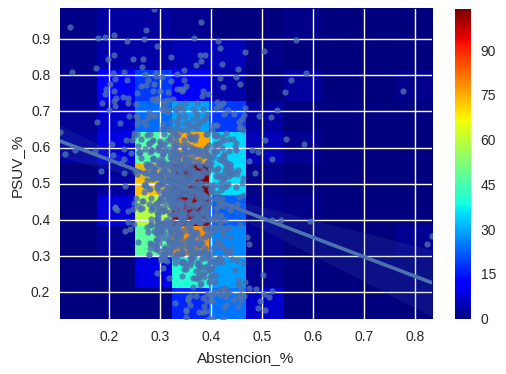

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


print df_out.columns
df_out = df_out.dropna(axis=0)
sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=100)
plt.xlabel('Abstencion %')
plt.ylabel('PSUV %')
plt.show()

plt.hist2d(df_out['Abstencion_%'],  df_out['PSUV_%'], (10, 10), cmap=plt.cm.jet)
plt.colorbar()

sns.regplot(x="Abstencion_%", y="PSUV_%", data=df_out);



[u'PQ. CARACCIOLO PARRA PJARDIN DE INFANCIA ELOY PAREDES', u'PQ. JUAN RODRIGUEZ SUAREZCOLEGIO NUESTRA SENORA DEL ROSARIO', u'PQ. JUAN RODRIGUEZ SUAREZESCUELA BASICA ESTADO LARA', u'PQ. EL LLANOPREESCOLAR ANANIAS AVENDANO']


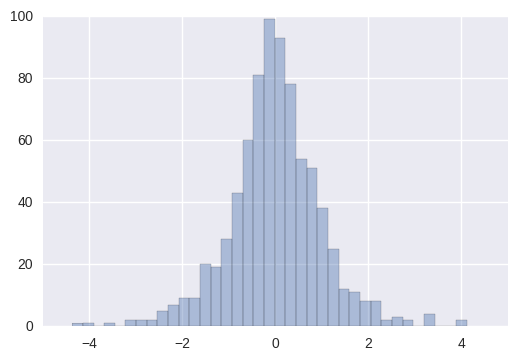

In [5]:
import math
sns.distplot((df_out[df_out['centro_standarised_residual']!=0][['centro_standarised_residual']]),kde=False)

list_centros = list(df_out[df_out['centro_standarised_residual']<-3]['centro'])

print list_centros





-0.62209738489526889

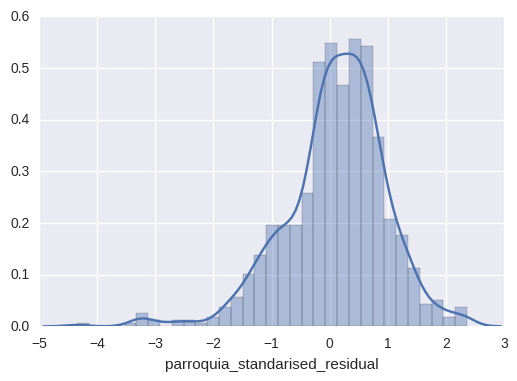

In [6]:
sns.distplot(df_out[df_out['centro_standarised_residual']!=0]['parroquia_standarised_residual']);

df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'].mean()

#sns.distplot(df_out['PSUV_%']);


-0.079282203418558211

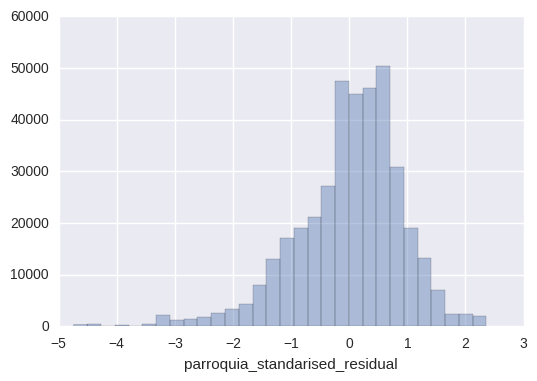

In [7]:
sns.distplot(df_out['parroquia_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});

list_centros = list(df_out[df_out['parroquia_standarised_residual']<2]['centro'])


df_out[df_out['centro']==list_centros[0]]

df_out[df_out['parroquia_standarised_residual']<0]['VOTOS VALIDOS'].sum()-df_out[df_out['parroquia_standarised_residual']>0]['VOTOS VALIDOS'].sum()

#df_out[df_out['parroquia_standarised_residual']<0]['VOTOS VALIDOS']-df_out[df_out['parroquia_standarised_residual']>0]['VOTOS VALIDOS']

df_out['parroquia_standarised_residual'].mean()

#df_out['parroquia_standarised_residual'].kurt()



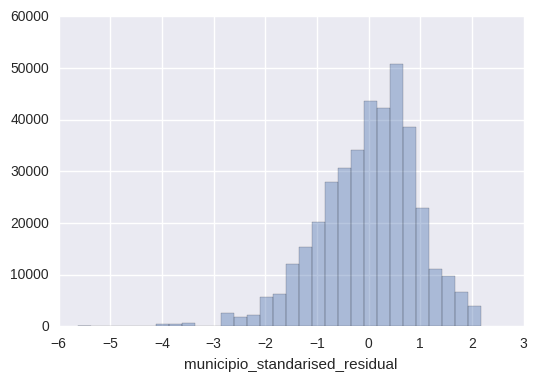

In [8]:
sns.distplot(df_out['municipio_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});


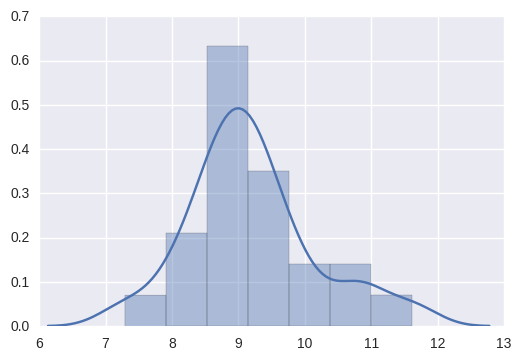

In [29]:
import math

list_centros = np.unique(df_out['municipio'])

rescaled_v = []
for i in list_centros:
    
    df = df_out[df_out['municipio']==i]
    
    rescaled_v.append(math.log(df['VOTOS VALIDOS'].sum()-df['PSUV_N'].sum()/float(df['PSUV_N'].sum())))
    
    
sns.distplot(np.array(rescaled_v));


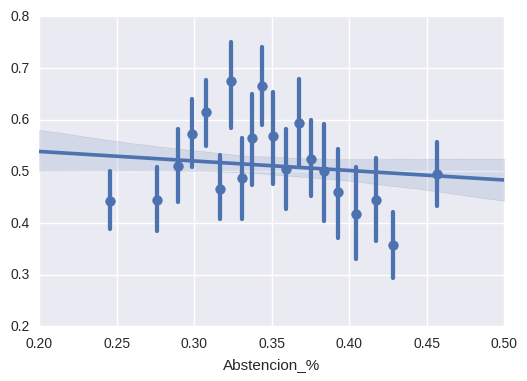

In [60]:
l = list(df_out.set_index('Abstencion_%').cumsum()['PSUV_N']/df_out['PSUV_N'].sum())
a = df_out['Abstencion_%']



sns.regplot(df_out['Abstencion_%'], np.array(l),x_bins=20);

